><span style='color:#556B2F'><font size="6">INTRODUCTION </span><br></font>

The datasets contains transactions made by credit cards in **September 2013** by european cardholders. This dataset presents transactions that occurred in two days, where we have **492 frauds** out of **284,807 transactions**. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

Features **V1**, **V2**, ... **V28** are the principal components obtained with **PCA**;

**Feature Class** is the response variable and it takes value **1** in case of fraud and **0** otherwise.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn import svm
from collections import Counter
from numpy import where

<span style='color:#556B2F'><font size="5"> Glimpse of Data</span><br></font>

In [2]:
credit=pd.read_csv('creditcard.csv')
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
print("Credit Card Fraud Detection data -  rows:",credit.shape[0]," columns:", credit.shape[1])

Credit Card Fraud Detection data -  rows: 284807  columns: 31


In [43]:
credit.describe().style.background_gradient(cmap='YlOrRd')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.349619,0.001727
std,47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,1.088850,1.020713,0.999201,0.995274,0.958596,0.915316,0.876253,0.849337,0.838176,0.814041,0.770925,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,-0.535426,-0.762494,-0.405571,-0.648539,-0.425574,-0.582884,-0.468037,-0.483748,-0.498850,-0.456299,-0.211721,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,-0.092917,-0.032757,0.140033,-0.013568,0.050601,0.048072,0.066413,-0.065676,-0.003636,0.003735,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,0.453923,0.739593,0.618238,0.662505,0.493150,0.648821,0.523296,0.399675,0.500807,0.458949,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [6]:
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<span style='color:#556B2F'><font size="5">Insights of the DataSet</span><br></font>

In [7]:
##Checking Class column
credit['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

D:\AnaConda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


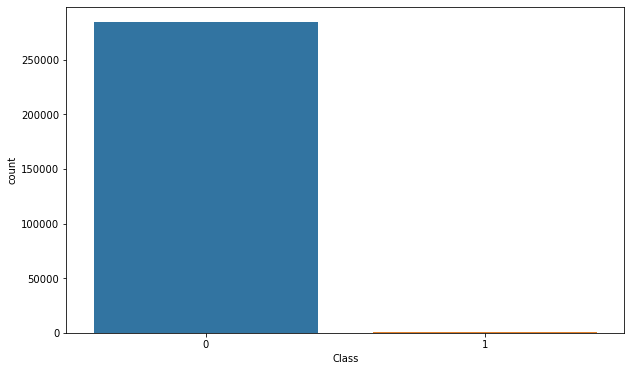

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(credit['Class'])
plt.show()

**DataSet is Unbalanced**

<span style='color:#556B2F'><font size="3">It is quite observable here that the 'CLASS' variable has unbalanced occurences of both the results (0 and 1). So it is important to balance the data before we move on to actual training of the model.</span><br></font>

><span style='color:#556B2F'><font size="2">Creating backup file </span><br></font>

In [9]:
df_back=credit.copy() ## Creating backup file 

><span style='color:#556B2F'><font size="3">Undersampling and OverSampling</span><br></font>

**Oversampling** and **undersampling** in data analysis are techniques used to adjust the class distribution of a data set.

Random oversampling duplicates examples from the minority class in the training dataset and can result in overfitting for some models.

Random undersampling deletes examples from the majority class and can result in losing information invaluable to a model.

**Samplings Used**

Near Miss(Version=1) Undersampling

SMOTE Oversampling

In [19]:
x_int=credit.drop('Class',axis=1)
y_int=credit['Class']

In [11]:
import imblearn

In [20]:
# from imblearn.under_sampling import 
undersample_data=imblearn.under_sampling.NearMiss(version=1)
x,y=undersample_data.fit_resample(x_int,y_int)

print('Resample dataset shape', Counter(y))

Resample dataset shape Counter({0: 492, 1: 492})


D:\AnaConda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


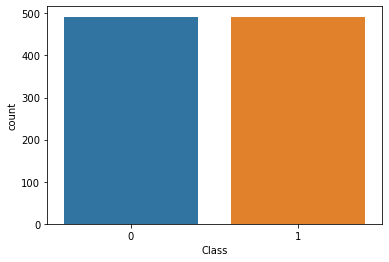

In [44]:
sns.countplot(y)
plt.show()

<span style='color:#556B2F'><font size="">A logical interpretation would say that this is not the appropriate way to balance the data. </span><br></font>
<span style='color:#556B2F'><font size="">In this case because of too much data loss (reducing 280000 tuples to just 492). But we would run the test anyway</span><br></font>
<span style='color:#556B2F'><font size="">just to see how wrong the current consideration is. </span><br></font>

<span style='color:#556B2F'><font size="4">1. Building Machine Learning Models </span><br></font>

Navie Bayes

CatBoostRegressor

Random Forest Classifier

Logistics Regressor

SVM
<span style='color:#556B2F'><font size="6"> </span><br></font>

**2.Metrics**

<span style='color:#556B2F'><font size="1"> Kappa:</span><br></font> It basically tells you how much better your classifier is performing over the performance of a classifier that simply guesses at random according to the frequency of each class.
![Kappa](kappa.png)

<span style='color:#556B2F'><font size="1">Precision Score:</span><br></font> What proportion of predicted positives are truly positive ? Used when we need to predict the positive thoroughly.

<span style='color:#556B2F'><font size="1">Recall Score:</span><br></font> What proportion of actual positives is correctly classified ? choice when we want to capture as many positives as possible

<span style='color:#556B2F'><font size="1"> Receiver Operating characteristic curve(ROC_AUC):</span><br></font>It is an evaluation metric that helps identify the strength of the model to distinguish between two outcomes. It defines if a model can create a clear boundary between the postive and the negative class.

<span style='color:#556B2F'><font size="1">F1 Score:</span><br></font>It is the harmonic mean of the precision and recall.


In [22]:
##Splitting the dataset in training and testin
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)


In [23]:
from sklearn.preprocessing import MinMaxScaler
mmScalar= MinMaxScaler()
X_train=mmScalar.fit_transform(X_train)
X_test=mmScalar.fit_transform(X_test)
X_train.shape

(738, 30)

In [24]:
print('----NaiveBayes--')
model_gnb=GaussianNB()
model_gnb.fit(X_train,y_train)

print('----Random Forest Classifier--')
model_rf=RandomForestClassifier(n_jobs=4, 
                             random_state=42,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)
model_rf.fit(X_train,y_train)

print('----CatBoost Regressor--')
model_cat=CatBoostClassifier()
model_cat.fit(X_train,y_train)

print('---SVM---')
model_svm=svm.SVC(kernel='linear', random_state=0)
model_svm.fit(X_train,y_train)

print('---Logistic Regressor---')
model_lg=LogisticRegression()
model_lg.fit(X_train,y_train)

----NaiveBayes--
----Random Forest Classifier--
----CatBoost Regressor--
Learning rate set to 0.009049
0:	learn: 0.6797545	total: 3.46ms	remaining: 3.46s
1:	learn: 0.6669679	total: 6.8ms	remaining: 3.4s
2:	learn: 0.6551171	total: 10.2ms	remaining: 3.4s
3:	learn: 0.6427554	total: 13.7ms	remaining: 3.42s
4:	learn: 0.6293997	total: 17.1ms	remaining: 3.39s
5:	learn: 0.6172415	total: 20.4ms	remaining: 3.38s
6:	learn: 0.6082072	total: 23.9ms	remaining: 3.39s
7:	learn: 0.5950771	total: 28.1ms	remaining: 3.48s
8:	learn: 0.5865928	total: 31.6ms	remaining: 3.48s
9:	learn: 0.5751625	total: 35.5ms	remaining: 3.51s
10:	learn: 0.5637741	total: 39.4ms	remaining: 3.54s
11:	learn: 0.5535975	total: 43.1ms	remaining: 3.54s
12:	learn: 0.5425174	total: 46.5ms	remaining: 3.53s
13:	learn: 0.5332724	total: 50.2ms	remaining: 3.53s
14:	learn: 0.5231823	total: 53.6ms	remaining: 3.52s
15:	learn: 0.5132634	total: 57.2ms	remaining: 3.52s
16:	learn: 0.5029921	total: 60.6ms	remaining: 3.5s
17:	learn: 0.4937258	total:

LogisticRegression()

In [25]:
## Predicting Test data with different Regressor Models
print('----Logistic Regressor----')

pred_lg=model_lg.predict(X_test)

print('---Random Forest Classifier---')

pred_rf=model_rf.predict(X_test)

print('---Catboost Regressor---')

pred_cat=model_cat.predict(X_test)

print('---Support vector Classifier---')

pred_svm=model_svm.predict(X_test)

print('---Naive Bayes---')

pred_gnb=model_gnb.predict(X_test)


----Logistic Regressor----
---Random Forest Classifier---
---Catboost Regressor---
---Support vector Classifier---
---Naive Bayes---


In [26]:
print('---Logistics Regressor---')
print('ROC_AUC_SCORE', roc_auc_score(y_test, pred_lg ))
print('Kappa:', metrics.cohen_kappa_score(y_test,pred_lg))
print('precision:' , metrics.precision_score(y_test,pred_lg))
print('f1_score:',  metrics.f1_score(y_test,pred_lg))
print('recall:',  metrics.recall_score(y_test,pred_lg))

print('\n')

print('---Naive Bayes---')
print('ROC_AUC_SCORE', roc_auc_score(y_test, pred_gnb ))
print('Kappa:', metrics.cohen_kappa_score(y_test,pred_gnb))
print('precision:' , metrics.precision_score(y_test,pred_gnb))
print('f1_score:',  metrics.f1_score(y_test,pred_gnb))
print('recall:',  metrics.recall_score(y_test,pred_gnb))
print('\n')

print('---CatBoost Regressor---')
print('ROC_AUC_SCORE', roc_auc_score(y_test, pred_cat ))
print('Kappa:', metrics.cohen_kappa_score(y_test,pred_cat))
print('precision:' , metrics.precision_score(y_test,pred_cat))
print('f1_score:',  metrics.f1_score(y_test,pred_cat))
print('recall:',  metrics.recall_score(y_test,pred_cat))
print('\n')

print('---SVM---')
print('ROC_AUC_SCORE', roc_auc_score(y_test, pred_svm ))
print('Kappa:', metrics.cohen_kappa_score(y_test, pred_svm))
print('precision:' , metrics.precision_score(y_test, pred_svm))
print('f1_score:',  metrics.f1_score(y_test, pred_svm))
print('recall:',  metrics.recall_score(y_test, pred_svm))
print('\n')

print('---Random Forest Classifier---')
print('ROC_AUC_SCORE', roc_auc_score(y_test, pred_rf))
print('Kappa:', metrics.cohen_kappa_score(y_test, pred_rf))
print('precision:' , metrics.precision_score(y_test, pred_rf))
print('f1_score:',  metrics.f1_score(y_test, pred_rf))
print('recall:',  metrics.recall_score(y_test, pred_rf))


---Logistics Regressor---
ROC_AUC_SCORE 0.9053030303030303
Kappa: 0.7986643095659006
precision: 1.0
f1_score: 0.895397489539749
recall: 0.8106060606060606


---Naive Bayes---
ROC_AUC_SCORE 0.5
Kappa: 0.0
precision: 0.5365853658536586
f1_score: 0.6984126984126985
recall: 1.0


---CatBoost Regressor---
ROC_AUC_SCORE 0.9356060606060606
Kappa: 0.8624432603118216
precision: 1.0
f1_score: 0.9311740890688259
recall: 0.8712121212121212


---SVM---
ROC_AUC_SCORE 0.8977272727272727
Kappa: 0.7828134196586227
precision: 1.0
f1_score: 0.8860759493670886
recall: 0.7954545454545454


---Random Forest Classifier---
ROC_AUC_SCORE 0.946371610845295
Kappa: 0.886381631037213
precision: 0.9916666666666667
f1_score: 0.9444444444444444
recall: 0.9015151515151515


**From the Above Results, The Top 2 Models by ROC_AUC_SCORE, cohen_kappa_score, precision_score, f1_score, recall_score are**

>***1. Random Forest Classifier  2. CatBoost Classifier***



<span style='color:#556B2F'><font size="2">Now Using Over sampling: </span><br></font>
<span style='color:#556B2F'><font size="2">Smote Oversampling:</span><br></font>In this technique, instead of simply duplicating data from the minority class, we synthesize new data from the minority class. This is a type of data augmentation for tabular data can be very effective.



In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
smote_X ,smote_Y = smote.fit_resample(x_int,y_int)
smote_Y.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

<span style='color:#556B2F'><font size="2">Running all model again with this SMOTE Over sampling</span><br></font>

In [28]:
##splitting the dataset into train and test dataset 
Xsm_train, Xsm_test, ysm_train, ysm_test = train_test_split(smote_X, smote_Y, test_size=0.5, random_state=0)

In [29]:
from sklearn.preprocessing import MinMaxScaler
mmScalar= MinMaxScaler()
Xsm_train=mmScalar.fit_transform(Xsm_train)
Xsm_test=mmScalar.fit_transform(Xsm_test)
Xsm_train.shape

(284315, 30)

In [30]:
print('----NaiveBayes--')
modelsm_gnb=GaussianNB()
modelsm_gnb.fit(Xsm_train,ysm_train)

print('----Random Forest Classifier--')
modelsm_rf=RandomForestClassifier(n_jobs=4, 
                             random_state=42,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)
modelsm_rf.fit(Xsm_train,ysm_train)

print('----CatBoost Regressor--')
modelsm_cat=CatBoostClassifier()
modelsm_cat.fit(Xsm_train,ysm_train)

print('---SVM---')
modelsm_svm=svm.SVC(kernel='linear', random_state=0)
modelsm_svm.fit(Xsm_train,ysm_train)

print('---Logistic Regressor---')
modelsm_lg=LogisticRegression()
modelsm_lg.fit(Xsm_train,ysm_train)

----NaiveBayes--
----Random Forest Classifier--
----CatBoost Regressor--
Learning rate set to 0.115002
0:	learn: 0.4647028	total: 78.6ms	remaining: 1m 18s
1:	learn: 0.3076553	total: 124ms	remaining: 1m 1s
2:	learn: 0.2251463	total: 166ms	remaining: 55.3s
3:	learn: 0.1736899	total: 215ms	remaining: 53.5s
4:	learn: 0.1445186	total: 257ms	remaining: 51.2s
5:	learn: 0.1236186	total: 296ms	remaining: 49s
6:	learn: 0.1104619	total: 332ms	remaining: 47.2s
7:	learn: 0.0998494	total: 371ms	remaining: 46s
8:	learn: 0.0915142	total: 414ms	remaining: 45.6s
9:	learn: 0.0843413	total: 459ms	remaining: 45.5s
10:	learn: 0.0793425	total: 500ms	remaining: 44.9s
11:	learn: 0.0760319	total: 539ms	remaining: 44.4s
12:	learn: 0.0720381	total: 577ms	remaining: 43.8s
13:	learn: 0.0688177	total: 625ms	remaining: 44s
14:	learn: 0.0672067	total: 668ms	remaining: 43.9s
15:	learn: 0.0647690	total: 714ms	remaining: 43.9s
16:	learn: 0.0621036	total: 760ms	remaining: 43.9s
17:	learn: 0.0597883	total: 801ms	remaining:

D:\AnaConda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
## Predicting Test data with different Regressor Models
print('----Logistic Regressor----')

predsm_lg=modelsm_lg.predict(Xsm_test)

print('---Random Forest Classifier---')

predsm_rf=modelsm_rf.predict(Xsm_test)

print('---Catboost Regressor---')

predsm_cat=modelsm_cat.predict(Xsm_test)

print('---Support vector Classifier---')

predsm_svm=modelsm_svm.predict(Xsm_test)

print('---Naive Bayes---')

predsm_gnb=modelsm_gnb.predict(Xsm_test)


----Logistic Regressor----
---Random Forest Classifier---
---Catboost Regressor---
---Support vector Classifier---
---Naive Bayes---


In [39]:
print('---Logistics Regressor---')
print('ROC_AUC_SCORE', roc_auc_score(ysm_test, predsm_lg ))
print('Kappa:', metrics.cohen_kappa_score(ysm_test, predsm_lg))
print('precision:' , metrics.precision_score(ysm_test, predsm_lg))
print('f1_score:',  metrics.f1_score(ysm_test, predsm_lg))
print('recall:',  metrics.recall_score(ysm_test, predsm_lg))

print('\n')

print('---Naive Bayes---')
print('ROC_AUC_SCORE', roc_auc_score(ysm_test, predsm_gnb ))
print('Kappa:', metrics.cohen_kappa_score(ysm_test, predsm_gnb))
print('precision:' , metrics.precision_score(ysm_test, predsm_gnb))
print('f1_score:',  metrics.f1_score(ysm_test, predsm_gnb))
print('recall:',  metrics.recall_score(ysm_test, predsm_gnb))
print('\n')

print('---CatBoost Regressor---')
print('ROC_AUC_SCORE', roc_auc_score(ysm_test, predsm_cat ))
print('Kappa:', metrics.cohen_kappa_score(ysm_test, predsm_cat))
print('precision:' , metrics.precision_score(ysm_test, predsm_cat))
print('f1_score:',  metrics.f1_score(ysm_test, predsm_cat))
print('recall:',  metrics.recall_score(ysm_test, predsm_cat))
print('\n')

print('---SVM---')
print('ROC_AUC_SCORE', roc_auc_score(ysm_test, predsm_svm ))
print('Kappa:', metrics.cohen_kappa_score(ysm_test, predsm_svm))
print('precision:' , metrics.precision_score(ysm_test, predsm_svm))
print('f1_score:',  metrics.f1_score(ysm_test, predsm_svm))
print('recall:',  metrics.recall_score(ysm_test, predsm_svm))
print('\n')

print('---Random Forest Classifier---')
print('ROC_AUC_SCORE', roc_auc_score(ysm_test, predsm_rf))
print('Kappa:', metrics.cohen_kappa_score(ysm_test, predsm_rf))
print('precision:' , metrics.precision_score(ysm_test, predsm_rf))
print('f1_score:',  metrics.f1_score(ysm_test, predsm_rf))
print('recall:',  metrics.recall_score(ysm_test, predsm_rf))

---Logistics Regressor---
ROC_AUC_SCORE 0.9691770875156948
Kappa: 0.9383635220983353
precision: 0.994651732067354
f1_score: 0.9683613779157939
recall: 0.9434250334201083


---Naive Bayes---
ROC_AUC_SCORE 0.5
Kappa: 0.0
precision: 0.499903276295658
f1_score: 0.6665806844962422
recall: 1.0


---CatBoost Regressor---
ROC_AUC_SCORE 0.8188489819341435
Kappa: 0.6377426002398584
precision: 0.9996692246626091
f1_score: 0.778830542980595
recall: 0.6379089565890382


---SVM---
ROC_AUC_SCORE 0.9701052023788671
Kappa: 0.9402205840523644
precision: 0.9979802346207164
f1_score: 0.9692440210782326
recall: 0.9421163723351861


---Random Forest Classifier---
ROC_AUC_SCORE 0.7023886841257292
Kappa: 0.4048239514671811
precision: 0.9996699612638746
f1_score: 0.5763674329866448
recall: 0.4049109969746007


**From the Above Results, The Top 2 Models by ROC_AUC_SCORE, cohen_kappa_score, precision_score, f1_score, recall_score are**

>***1. SVM   2. Logistic Regressor***
>>***We chose SVM as our model as it has better scores***

### Conclusion
<span style='color:#556B2F'><font size="2">After training each of the models, these are the final results. All of the scores for the SVM with SMOTE technique models are very promising for our dataset!</span><br></font> 
<span style='color:#556B2F'><font size="2">In the Kappa Score above, the scores for SVM with SMOTE Oversampling technique is pretty high compared to all, which is what we’d like to see.</span><br></font> <span style='color:Chocolate'><font size="2">So SVM with SMOTE Oversampling techniques is our final model, as this gives highest F1 score of 96.9% .</span><br></font>